# Introdução a Ciência dos Dados - Atividade 2

<span style="position: absolute; top: 10px; right: 10px; background: green; padding: 0.5em; color: white; border-radius: 0.25em; font-weight: bold">Vaux Gomes</span>

## Análise inicial

#### Bibliotecas

In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For tokenizing
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

# Wordcloud
from wordcloud import WordCloud
# pip install --upgrade pillow

[nltk_data] Downloading package punkt to /home/skywalker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/skywalker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Loading

In [2]:
df = pd.read_csv('../data/letras-com.csv', index_col=0)
df.head()

,rank,singer,title,url,album,genre,lang,views,lyrics
0,1,Anuel AA,Mejor Que Yo (part. DJ Luian y Mambo Kingz) [e...,https://www.letras.com/anuel/mejor-que-yo-part...,NaN,reggaeton,es,114305.0,"(Real hasta la muerte, baby) (Real hasta la mu..."
1,2,Grupo Frontera,un x100to (part. Bad Bunny),https://www.letras.com/grupo-frontera/un-x100t...,NaN,regional,es,296023.0,Me queda un porciento Y lo usaré solo para dec...
2,3,FIFTY FIFTY,Cupid (Twin Version),https://www.letras.com/fifty-fifty/cupid-twin-...,The Beginning: Cupid,k-pop,en,76579.0,A hopeless romantic all my life Surrounded by ...
3,4,Eslabon Armado,Ella Baila Sola (part. Peso Pluma),https://www.letras.com/eslabon-armado/ella-bai...,Ella Baila Sola,regional,es,137514.0,"Compa, ¿qué le parece esa morra? La que anda b..."
4,5,Montesanto,Santo Es El Que Vive,https://www.letras.com/montesanto/santo-es-el-...,NaN,gospelreligioso,es,37635.0,"Santo es el que vive, santo es el que reina Sa..."


#### Distribuição das linguagens

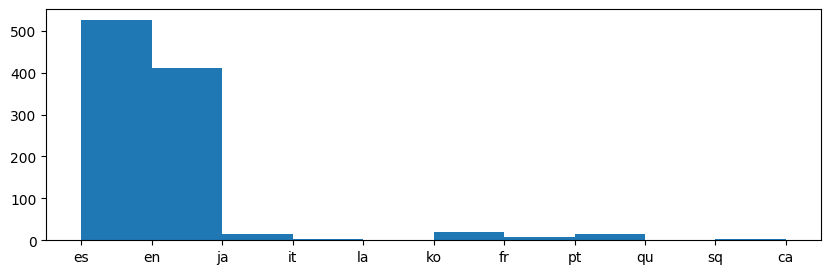

In [3]:
_ = df.lang.hist(figsize=(10, 3), grid=False)

#### Tokenização

In [4]:
langs = { # https://www.nltk.org/_modules/nltk/corpus/reader/wordlist.html
    "ca": "catalan", "cs": "czech", "de": "german", "el": "greek", "en": "english",
    "es": "spanish", "fi": "finnish", "fr": "french", "hu": "hungarian", "is": "icelandic",
    "it": "italian", "lv": "latvian", "nl": "dutch", "pl": "polish", "pt": "portuguese",
    "ro": "romanian", "ru": "russian", "sk": "slovak", "sl": "slovenian", "sv": "swedish",
    "ta": "tamil",
}

# Top 20 most frequent words
def extract_keywords(text, lang, num_keywords=20):    
    try:
        # Tokenizing workds
        tokens = word_tokenize(text.lower())

        # Removing stopwords
        stop_words = set(stopwords.words(lang))
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

        # Frequency of words
        fdist = FreqDist(tokens)

        # Most frequent keywords
        keywords = [word for word, _ in fdist.most_common(num_keywords)]

        return keywords
    except:
        return None
    
df['keywords'] = df[['lyrics', 'lang']].apply(
    lambda x: extract_keywords(x.lyrics, langs.get(x.lang, None)), axis=1)

#### Contagem das Palavras mais Frequentes (ES/EN/PT)

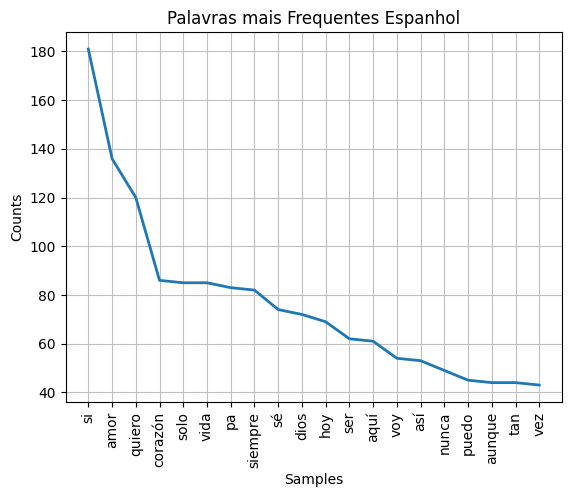

In [5]:
kw = df[df.lang == 'es'][['keywords']].apply(np.hstack, axis=0).keywords.to_numpy()
fdist_es = FreqDist(kw)
_ = fdist_es.plot(20, title='Palavras mais Frequentes Espanhol', percents=False)

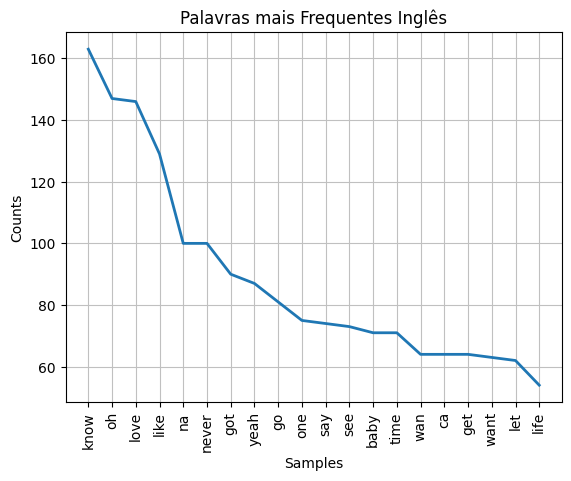

In [6]:
kw = df[df.lang == 'en'][['keywords']].apply(np.hstack, axis=0).keywords.to_numpy()
fdist_en = FreqDist(kw)
_ = fdist_en.plot(20, title='Palavras mais Frequentes Inglês', percents=False)

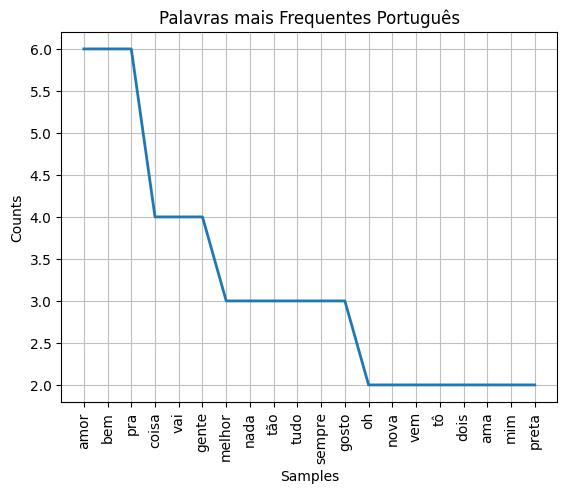

In [7]:
kw = df[df.lang == 'pt'][['keywords']].apply(np.hstack, axis=0).keywords.to_numpy()
fdist_pt = FreqDist(kw)
_ = fdist_pt.plot(20, title='Palavras mais Frequentes Português', percents=False)

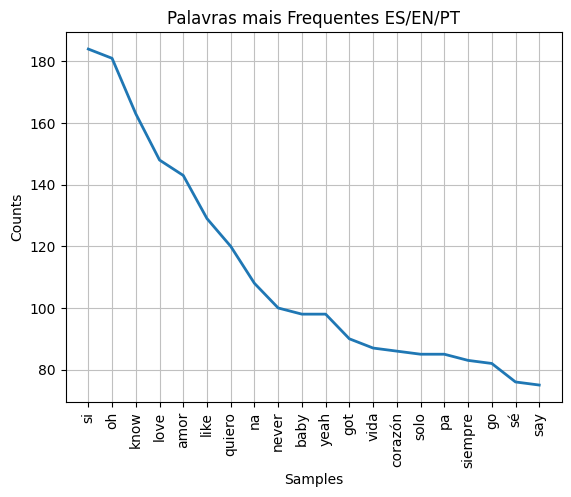

In [8]:
kw = df[(df.lang == 'en') | (df.lang == 'es') | (df.lang == 'pt')][['keywords']].apply(np.hstack, axis=0).keywords.to_numpy()
fdist = FreqDist(kw)
_ = fdist.plot(20, title='Palavras mais Frequentes ES/EN/PT', percents=False)

#### Núvem de palavras

In [28]:
wordcloud = WordCloud(width=1024, height=400, background_color='white').generate_from_frequencies(fdist_en)

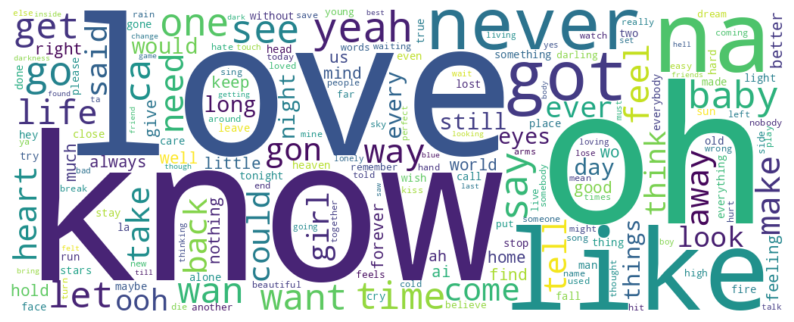

In [29]:
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()